# Logistic Regression

Statistical method used for classification problems , the goal is to predict the class labels of new dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_breast_cancer

## Exploratory Data Analysis (EDA)

In [3]:
X=pd.DataFrame(load_breast_cancer().data)
y=pd.DataFrame(load_breast_cancer().target)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y[0].value_counts()

1    357
0    212
Name: 0, dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [ ]:
#X['y']=y

## Model 

Importing the logistic regression model from sklearn 

In [8]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()      #initializing the model

### Spliting the data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 30)
(381, 1)
(188, 30)
(188, 1)


### Training the model

In [17]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [18]:
pred = clf.predict(X_test)

## Evaluation

In [19]:
clf.score(X_train,y_train)

0.9553805774278216

In [20]:
clf.score(X_test,y_test)

0.9627659574468085

The model is giving over 95% of accuracy for both train and test set, which is a pretty good accuracy

### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

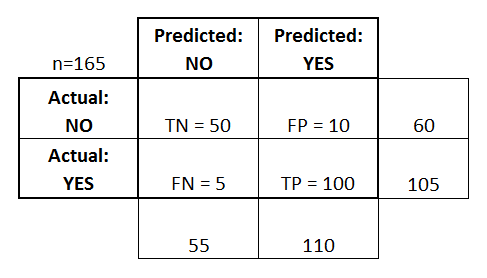

    true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
    true negatives (TN): We predicted no, and they don't have the disease.
    false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
    false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

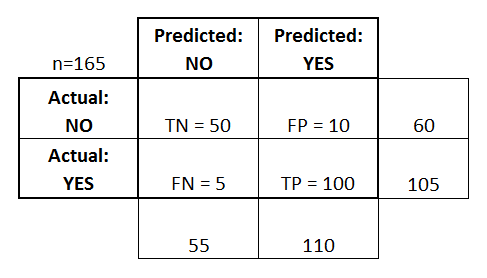

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

    Accuracy: Overall, how often is the classifier correct?
        (TP+TN)/total 
    Misclassification Rate: Overall, how often is it wrong?
        (FP+FN)/total (equivalent to 1 minus Accuracy),also known as "Error Rate"
    True Positive Rate: When it's actually yes, how often does it predict yes?
        TP/actual yes ,   also known as "Sensitivity" or "Recall"
    False Positive Rate: When it's actually no, how often does it predict yes?
        FP/actual no 
    Specificity: When it's actually no, how often does it predict no?
        TN/actual no ( equivalent to 1 minus False Positive Rate)
    Precision: When it predicts yes, how often is it correct?
        TP/predicted yes
    Prevalence: How often does the yes condition actually occur in our sample?
        actual yes/total 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 63,   4],
       [  4, 117]])

## Trying different Values of Parameter **C**

This parameter determines the strength of **regularization** . The higher values of C correspond to less regularization. In simple words, when we use high value for the parameter C, the logistic regression try to fit the training set as best as possible. This may result in variance(overfiting) problem , i.e the model will perform good with training dataset but not with test set.

C:\Users\JATIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


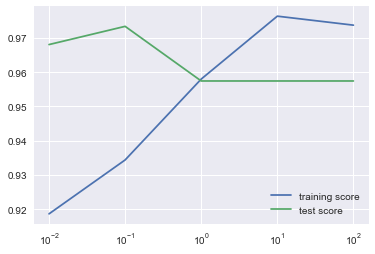

In [ ]:
c = [0.01,0.1,1,10,100]
test_score=[]
train_score=[]
for i in c:
    clf = LogisticRegression(C=i)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
    
plt.plot(c, train_score, label="training score")
plt.plot(c, test_score, label="test score")
plt.xscale('log')
plt.legend()